In [155]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import SGDClassifier

df = pd.read_csv("Abalone.csv") #read in data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


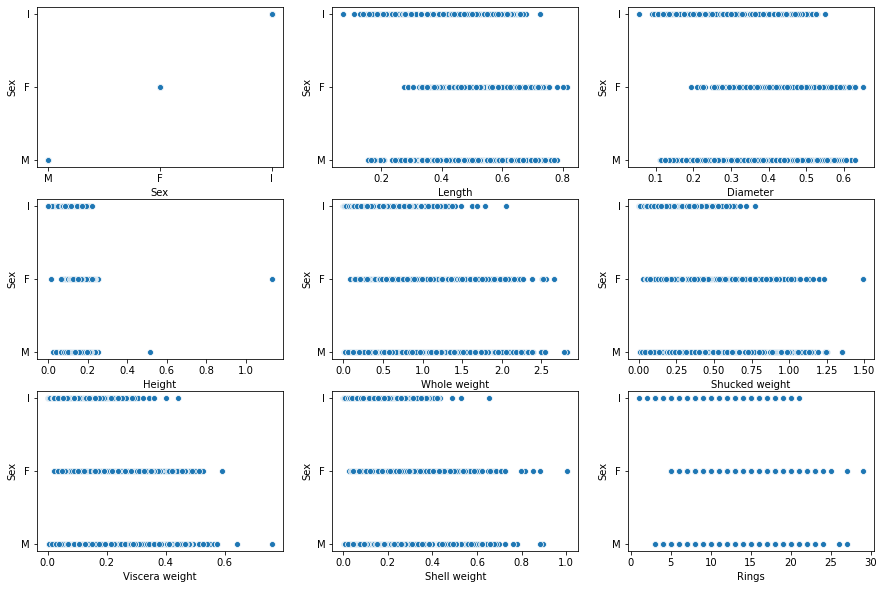

In [24]:
feature = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
plt.figure(figsize = (15,10)) #horizontal & vertical size in inches
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.scatterplot(data=df, x=i[1], y = 'Sex')
    
#we can use these graphs to determine which features have the most impact on our output

In [25]:
#preprocessing
#We find the most influential features to be length, Diameter, and Rings, so we discard the remaining columns
df = df.drop(columns = ['Height', 'Whole weight', 'Shucked weight', "Viscera weight", 'Shell weight'])
df.head()

,Sex,Length,Diameter,Rings
0,M,0.455,0.365,15
1,M,0.350,0.265,7
2,F,0.530,0.420,9
3,M,0.440,0.365,10
4,I,0.330,0.255,7


In [26]:
#we note that the sex column contains a third (intersex) class, so we eliminate rows of that class
df = df[df.Sex != 'I']
df.head()

,Sex,Length,Diameter,Rings
0,M,0.455,0.365,15
1,M,0.350,0.265,7
2,F,0.530,0.420,9
3,M,0.440,0.365,10
6,F,0.530,0.415,20


In [27]:
#set independent and dependent variables
x = df.iloc[:,1:4] #all entries from column 1 to 3
leng = df.iloc[:,1]
dim = df.iloc[:,2]
rin = df.iloc[:,3]
print(x)


      Length  Diameter  Rings
0      0.455     0.365     15
1      0.350     0.265      7
2      0.530     0.420      9
3      0.440     0.365     10
6      0.530     0.415     20
...      ...       ...    ...
4172   0.565     0.450     11
4173   0.590     0.440     10
4174   0.600     0.475      9
4175   0.625     0.485     10
4176   0.710     0.555     12

[2835 rows x 3 columns]


In [28]:
y = df.iloc[:,0]
print(y)

0       M
1       M
2       F
3       M
6       F
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 2835, dtype: object


In [163]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) #20% testing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)  # Don't cheat - fit only on training data
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)  # apply same transformation to test data

In [198]:
clf = SGDClassifier(loss="squared_loss", penalty="l1", max_iter=100000, alpha = .01)
clf.fit(x_train, y_train)
SGDClassifier(max_iter=100000)

SGDClassifier(max_iter=100000)

In [199]:
clf.predict(x_test)

array(['M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'F',
       'M', 'F', 'M', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'M', 'M', 'M',
       'M', 'F', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F',
       'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M',
       'M', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'M',
       'F', 'M', 'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'F', 'M',
       'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M',
       'M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'F',
       'M', 'F', 'M', 'F', 'F', 'F', 'F', 'M', 'F', 'M', 'M', 'M', 'M',
       'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M',
       'M', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M', 'F',
       'F', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'F', 'F', 'M', 'M',
       'F', 'F', 'M', 'M', 'M', 'M', 'M', 'F', 'F', 'M', 'M', 'M

In [202]:
score = clf.score(x_test, y_test)
print("Training score: ", score) 

Training score:  0.5185185185185185


In [203]:
ypred = clf.predict(x_test)

#confusion matrix
cm = confusion_matrix(y_test, ypred)
print(cm) 
 

[[126 133]
 [140 168]]


In [204]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [206]:
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))
predictions = logisticRegr.predict(x_test)